<a href="https://colab.research.google.com/github/patzaa/Pytorch-ML/blob/main/Pytorch_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Tensors
Mathematically, a scalar, vector, matrix, all are tensors. In ML the notion mostly refers to multidimensional arrays. 
Tensors in Pytorch have similar functionalities than np arrays. With the main difference that you can specify the executiong on CPU or GPU. 
 

**From numpy to torch tensor**

In [ ]:
import torch 
import numpy as np 


In [ ]:
np_array = np.random.rand(3,4)
tensor = torch.tensor(np_array)

**Create and manipulate torch tensors**


In [ ]:
#Create tensor randn, ones, zeros

tensor_rand = torch.randn(2,3,4)
tensor_ones = torch.ones(2,3,4)


#Reshape tensor using view()
reshaped_tensor = tensor_rand.view(-1,2)
print(reshaped_tensor) 

tensor([[ 1.9290,  0.6137],
        [-1.0168, -0.9069],
        [-0.9906,  0.1031],
        [ 0.4473, -1.7183],
        [-0.7991,  1.0434],
        [ 0.7823, -0.7586],
        [ 1.7122,  0.1826],
        [-0.1738, -0.7914]])


**numpy like indexing and slicing**

In [ ]:
tensor = torch.ones(3,4)
print('First row:', tensor[0])
print('First row first element', tensor[0][0])
print('First column', tensor[:,0])

tensor[:,1] = 0 
print(tensor)



First row: tensor([1., 1., 1., 1.])
First row first element tensor(1.)
First column tensor([1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**single element tensor**
The `item()` method converts a single element tensor to a Python numerical value.

**Tensor to GPU**

In [ ]:
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cpu


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [ ]:
tensor.to("cuda:0")

tensor([[0.0227, 0.8663, 0.9068, 0.6723],
        [0.8400, 0.5765, 0.2215, 0.9505],
        [0.8707, 0.5846, 0.8889, 0.7882]], device='cuda:0',
       dtype=torch.float64)

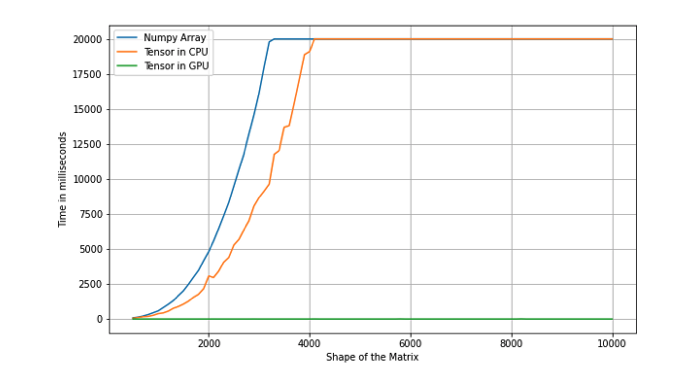

Graph tensors vs np arrays stored on GPU   


#2. Autograd
Automatic differentiation in pytorch with a simple linear regression example. 

In [ ]:
import torch  

a = torch.tensor([5.], requires_grad=True)
b = torch.tensor([4.], requires_grad=True)


J = a**3 + b**2 + a*b

Let’s assume a and b to be parameters of an NN, and J to be the error. In NN training, we want gradients of the error w.r.t. all parameters i.e.

$ \frac{dY}{da} = 3a^2 + a = 79$

$ \frac{dY}{db} = 2b + b = 13$

This can be automated when calling .backward() on J, autograd calculates these gradients and stores them in the respective tensors’ .grad attribute.

In [ ]:
J.backward()

a.grad
b.grad

tensor([13.])

In [ ]:
import torch 
import numpy as np

lr = 0.003


x = torch.randn(1, 50)
W = torch.randn(50, 1, requires_grad = True) #Slope
B = torch.randn(1, requires_grad=True) #Intersect



Y = torch.matmul(x, W) + B


loss = (1 - Y)
loss.backward()

# print the gradient of B
W.grad



tensor([[ 1.1149],
        [-1.0781],
        [-0.5265],
        [ 0.6010],
        [ 0.9952],
        [-0.1082],
        [-0.3713],
        [ 0.9032],
        [-0.6581],
        [-0.3815],
        [-1.3857],
        [-1.1868],
        [-1.4838],
        [ 0.9506],
        [-0.6123],
        [-0.6661],
        [-0.0342],
        [ 2.2274],
        [-1.2963],
        [ 0.8712],
        [ 1.0483],
        [ 2.1539],
        [-0.6225],
        [-0.1173],
        [-0.6479],
        [ 0.0188],
        [ 1.2609],
        [-1.3675],
        [ 2.0360],
        [-0.0532],
        [ 1.3730],
        [-0.8878],
        [-0.9322],
        [ 0.0284],
        [ 2.4114],
        [-0.7184],
        [-2.6210],
        [-0.7982],
        [ 0.8738],
        [-0.0249],
        [-1.0401],
        [-2.4637],
        [-0.1572],
        [ 1.0219],
        [-0.5047],
        [-0.4124],
        [ 0.8329],
        [-0.1749],
        [ 0.7471],
        [-1.0304]])

The `item() `function returns the loss's value as a float this can be used to calculate the mean loss per epoch

In [ ]:
loss.item()

# Dataset Class
A custom **dataset class** for tabular data sets containing of three main methods:



```
__init__ () 
```
```
__len__() 
```
```
__getitem__()
```
Make the data accessable by indexing. Specify the specific KEY to access them outside of Class using e.g. Labels = dataset["KEY"]

 

In [ ]:
import torch 
from sklearn.datasets import make_classification

In [ ]:
class Dataset():
  def __init__(self, data, targets):
    self.data = data
    self.targets = targets
  
  def __len__(self):
    return len(self.data)
  
  #returns a sample from the dataset at the given index idx
  def __getitem__(self, idx):
    current_sample = self.data[idx]
    current_target = self.targets[idx]
    return {
        "samples": torch.tensor(current_sample, dtype=torch.float),
        "target" : torch.tensor(current_target, dtype=torch.long)
    }

In [ ]:
#import custom data
data, targets = make_classification(n_samples=1000)

In [ ]:
#create dataset class

dataset_classification = Dataset(data=data, targets=targets)

In [ ]:
#fist element in dataset
dataset_classification[0:]["samples"]

tensor([[-1.1077,  0.0165,  1.5052,  ..., -0.8647, -0.8659,  1.0976],
        [ 0.3939,  0.1772,  1.9511,  ...,  0.6771, -2.1009, -1.3076],
        [-0.8618, -0.6664, -0.7384,  ..., -0.7248, -1.6828, -0.6917],
        ...,
        [ 0.8772, -0.0768,  1.2891,  ...,  0.5181, -0.7023, -0.4234],
        [-0.7236,  0.7958, -2.0639,  ...,  0.0162,  1.2244,  0.5253],
        [-1.1384, -0.7075,  0.6835,  ...,  0.4521, -0.2262,  1.5400]])

##Simple Dataset class for computer vision problems


In [ ]:
import torch 
import cv2
import numpy as np

class Dataset():
  def __init__(self, image_path, targets, augmentatios):
    self.image_path = image_path
    self.targets = targets
    self.augmentatios = augmentations

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    target = self.targets[idx]
    #loading an image given the path
    image = cv2.imread(self.image_paths[idx])
    #convert to RGB
    image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    augmented = self.augmentations(image=image, mask=mask)
    image = augmented["image"]
    mask = augmented["mask"]
    image = np.transpose(image, (2, 0, 1)).astype(np.float32)

    return{
        "image" : torch.tensor(image),
        "target" : torch.tensor(targets)
    }
    

Object `cv2.augmentations` not found.


##Simple Dataset class for NLP problems

In [ ]:
import torch 

class Dataset():
  def __init__(self, data, targets, tokenizer):
    self.data = data #usually a list of text
    self.targets = targets
    self.tokenizer = tokenizer

  def __len__(self):
    return len(self.data)


  def __getitem__(self, idx):
    text = self.data[idx] 
    target = self.targets[]

    #Tokenizer convert raw text to numbers stored in list input_id
    input_ids = tokenizer(text)
    
    return{
        "input_ids": torc.tensor(input_ids, dtype=torch.long),
        "targets": torch.tensor(targets)
    }
    

#Dataloader

 
The Dateset Class retrieves our dataset's features and lables one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting. Thats where Dataloaders come in handy as they wrap a iterable over the dataset.  

In [ ]:
?torch.utils.data.DataLoader

In [ ]:
train_dataloader = torch.utils.data.DataLoader(dataset_classification, batch_size=10, num_workers=2)

In [ ]:
# DataLoader returns an iterable 
for data in train_dataloader: 
  print(data["samples"].shape)
  break

torch.Size([10, 20])





#Example 
The following example creates a **Dataset Class** 
for a classification probem using sklearn to train a linera regression model



In [ ]:
import torch 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

NUM_EPOCHS = 10
BATCH_SIZE = 10
LR = 1e-2

In [ ]:
class Dataset():
  def __init__(self, data, targets):
    self.data = data
    self.targets = targets 

  def __len__(self):
    return self.data.shape[0]

  def __getitem__(self, idx):
    current_sample = self.data[idx]
    current_target = self.targets[idx]
    return {
        "samples": torch.tensor(current_sample),
        "target" : torch.tensor(current_target)
    }

In [ ]:
# 1. load entire dataset from sklearn
data, targets = make_classification(n_samples = 1000, n_features=20, random_state=42)

# 2. split data
train_data, validation_data, train_targets, validation_targets = train_test_split(
    data, 
    targets, 
    stratify=targets #keeps ratio of negative to positive samples equal in train and validation 
    )
# 3. instansiate Dataset object
train_dataset = Dataset(train_data, train_targets)
validation_dataset = Dataset(validation_data, validation_targets)

# 4. define an iterable trainloader object which we can iterate on in the trainig loop 

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size = BATCH_SIZE, 
    num_workers = 2
    )

validation_dataloader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size = BATCH_SIZE, 
    num_workers = 2
    )


Loading 

In [ ]:
#simpe linear regression model y = w*x + b
model = lambda x, w, b: torch.matmul(x, w.T) + b 

w = torch.randn(1,20, requires_grad=True)
b = torch.randn(1, requires_grad=True)



for epoch in range(NUM_EPOCHS):
  epoch_loss = 0 

  #iterating training set
  for data in train_dataloader: 
    xtrain = data["samples"]
    ytrain = data["target"]
    
    prediction = model(xtrain, w, b)
    loss = torch.mean((ytrain.view(-1) - prediction.view(-1))**2)
    loss = (prediction - ytrain).sum() 
    epoch_loss += loss.item()
    loss.backwards()
    
    with torch.no_grad(): 
      w =  w - LR * w.grad
      b =  b - LR * b.grad

    w.requires_grad(True)
    b.requires_grad(False)
  
  print(epoch, epoch_loss)

    
    


NameError: ignored

In [ ]:
train_data.shape



TypeError: ignored

#Optimization 
The Optimization step consists of two main activities: 



*   **Trian Loop**: iterate over the training dataset 
*   **Validation/ Test Loop**: iterate over the test set to see if model performance is improving 

### Loss - Function 
measures the degree of dissimilarity between predictions and target values. 

Classification Tasks:
```
#negative log likelihood loss
Loss_fn = nn.NLLLoss()
```
```
Loss_fn = nn.CrossEntropyLoss()
```
Regression Tasks: 
```
Loss_fn = nn.MSELoss()
```


### Optimizer 

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

```optimizer = torch.optim.SGD( model.parameters(), rl= learning_rate) ```
`


The logic is encapsulated in the ```optimizer``` object and happens in three steps: 



1.   ```optimizer.zero_grad()``` the gradient of the parameters by default add up so we need to reset them at each iteration 


2.   ```loss.backwards()``` calculate the gradient w.r.t each parameter 

3. ```optimizer.step()``` to adjust the parameters by the gradients collected in the backward pass.



